In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
import numpy


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#caracteristics = pd.read_csv("caracteristics.csv")
holidays = pd.read_csv("holidays.csv")
places = pd.read_csv("places.csv",low_memory=False)
users = pd.read_csv("users.csv")
vehicles = pd.read_csv("vehicles.csv")
caracteristics = pd.read_csv("caracteristics.csv",encoding='latin-1',low_memory=False)

# Data cleanning 

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
places = places[places.nbv <= 10]
places['prof'] = places['prof'].replace(0.0, 1.0)

places['plan'] = places['plan'].replace(0.0, 1.0)


places['surf'] = places['surf'].replace(0.0, 1.0)



places['circ'] = places['circ'].replace(0.0, 2.0)

In [6]:
domtom = [971,972,973,974,976,975] #But this doesn't include les Antilles (Martinique or Guadeloupe) cause they're not departements

caracteristics = caracteristics[~caracteristics.dep.isin(domtom)]

In [7]:
caracteristics['lum'] = caracteristics['lum'].replace(0, 1)

caracteristics['int'] = caracteristics['int'].replace(0, 1)
# Dropping les Antilles so we can stay on only le Métropole
caracteristics = caracteristics[caracteristics.gps != "A"]

# Le Merge

In [8]:
Merging = [caracteristics,users,places]
accidents = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc'],how='left'),Merging)
Merging = [accidents,vehicles]
accidents = reduce(lambda left,right: pd.merge(left,right,on=['Num_Acc','num_veh'],how='left'),Merging)


In [9]:
missing_values_table(accidents)

Your selected dataframe has 51 columns.
There are 38 columns that have missing values.


,Missing Values,% of Total Values
v2,1737406,95.7
v1,1093138,60.2
long,1013095,55.8
lat,1013085,55.8
gps,1007162,55.5
pr1,894168,49.3
pr,891691,49.1
adr,322766,17.8
voie,125732,6.9
place,96999,5.3


In [10]:
accidents = accidents.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'adr', 'voie','long','lat',
                            'gps','locp', 'actp', 'etatp','larrout','env1','vosp','place',
                            'manv','obsm','obs','senc'], axis=1)
df=accidents

In [11]:
missing_values_table(accidents)

Your selected dataframe has 30 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
secu,41913,2.3
infra,6694,0.4
situ,6225,0.3
surf,6035,0.3
plan,6023,0.3
prof,5982,0.3
circ,5352,0.3
catr,5319,0.3
nbv,5317,0.3
an_nais,2240,0.1


In [12]:
# replace nan by mode
for i in accidents.columns:
    accidents[i].fillna(accidents[i].mode()[0], inplace=True)

In [13]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1815321 entries, 0 to 1815320
Data columns (total 30 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   an       int64  
 2   mois     int64  
 3   jour     int64  
 4   hrmn     int64  
 5   lum      int64  
 6   agg      int64  
 7   int      int64  
 8   atm      float64
 9   col      float64
 10  com      float64
 11  dep      int64  
 12  catu     int64  
 13  grav     int64  
 14  sexe     int64  
 15  trajet   float64
 16  secu     float64
 17  an_nais  float64
 18  num_veh  object 
 19  catr     float64
 20  circ     float64
 21  nbv      float64
 22  prof     float64
 23  plan     float64
 24  surf     float64
 25  infra    float64
 26  situ     float64
 27  catv     float64
 28  occutc   float64
 29  choc     float64
dtypes: float64(17), int64(12), object(1)
memory usage: 429.3+ MB


# One hot encoding

In [24]:
df_ohe = accidents.drop(['Num_Acc','jour','hrmn','com','num_veh','dep','an_nais','catv','occutc','agg','grav'], axis = 1)
df_ohe = df_ohe.astype(float)
df_ohe
Y= accidents['grav']

In [25]:
df_ohe.columns

Index(['an', 'mois', 'lum', 'int', 'atm', 'col', 'catu', 'sexe', 'trajet',
       'secu', 'catr', 'circ', 'nbv', 'prof', 'plan', 'surf', 'infra', 'situ',
       'choc'],
      dtype='object')

In [26]:
columns = ['an', 'mois', 'lum', 'int', 'atm', 'col', 'catr', 'circ', 'nbv', 'prof',
       'plan', 'surf', 'infra', 'situ', 'catu', 'sexe', 'trajet',
       'secu', 'choc']


accidents_ohe = pd.get_dummies(df_ohe, columns= columns )
accidents_ohe

,an_5.0,an_6.0,an_7.0,an_8.0,an_9.0,an_10.0,an_11.0,an_12.0,an_13.0,an_14.0,...,choc_0.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,choc_5.0,choc_6.0,choc_7.0,choc_8.0,choc_9.0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815316,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1815317,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1815318,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1815319,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#data_rescaled = scaler.fit_transform(accidents_ohe)
#data_rescaled


pca = PCA(0.95)
reduced = pca.fit_transform(accidents_ohe)


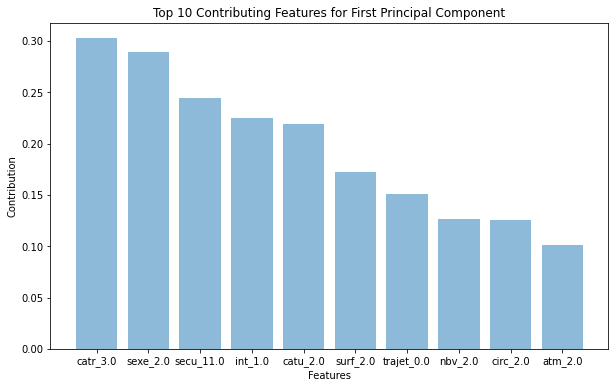

In [56]:
contrib = pca.components_[0]


feature_names = list(accidents_ohe.columns)

# Zip the feature names and contributions together and sort in descending order by contribution
sorted_contrib = sorted(zip(feature_names, contrib), key=lambda x: x[1], reverse=True)

# Select the top 10 contributions
top_10 = sorted_contrib[:10]

# Unzip the top 10 feature names and contributions
feature_names, contrib = zip(*top_10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the contribution of the first principal component
plt.bar(feature_names, contrib, alpha=0.5)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Contribution")
plt.title("Top 10 Contributing Features for First Principal Component")

# Show the plot
plt.show()


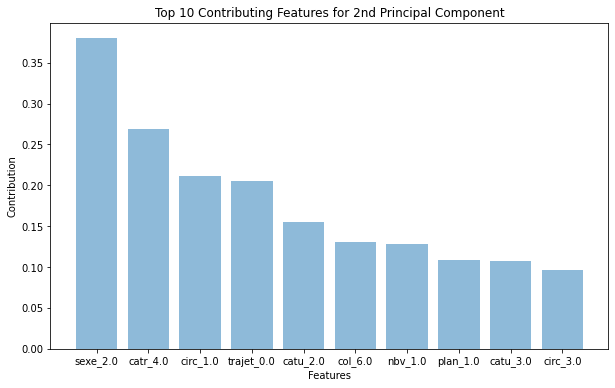

In [57]:
contrib = pca.components_[1]

feature_names = list(accidents_ohe.columns)

# Zip the feature names and contributions together and sort in descending order by contribution
sorted_contrib = sorted(zip(feature_names, contrib), key=lambda x: x[1], reverse=True)

# Select the top 10 contributions
top_10 = sorted_contrib[:10]

# Unzip the top 10 feature names and contributions
feature_names, contrib = zip(*top_10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the contribution of the second principal component
plt.bar(feature_names, contrib, alpha=0.5)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Contribution")
plt.title("Top 10 Contributing Features for 2nd Principal Component")

# Show the plot
plt.show()


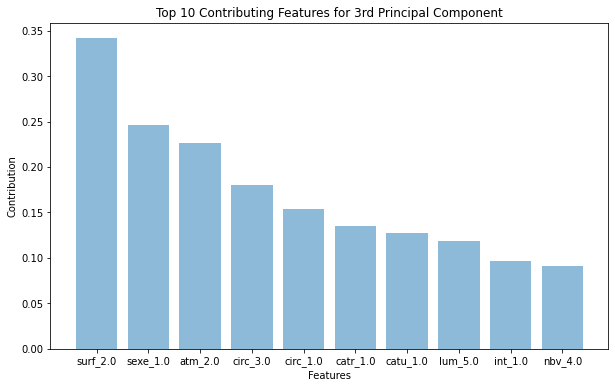

In [59]:
contrib = pca.components_[2]

feature_names = list(accidents_ohe.columns)

# Zip the feature names and contributions together and sort in descending order by contribution
sorted_contrib = sorted(zip(feature_names, contrib), key=lambda x: x[1], reverse=True)

# Select the top 10 contributions
top_10 = sorted_contrib[:10]

# Unzip the top 10 feature names and contributions
feature_names, contrib = zip(*top_10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the contribution of the 3rd principal component
plt.bar(feature_names, contrib, alpha=0.5)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Contribution")
plt.title("Top 10 Contributing Features for 3rd Principal Component")

# Show the plot
plt.show()


In [58]:
print(pca.explained_variance_ratio_)

[0.05757282 0.05261262 0.0483449  0.04464131 0.04000219 0.0363652
 0.03010169 0.02959967 0.02641592 0.02504781 0.02428147 0.02259022
 0.02127573 0.018671   0.01681631 0.01582724 0.01497651 0.01355555
 0.01305633 0.0123822  0.01169468 0.01125769 0.01076223 0.01048097
 0.0101871  0.0100856  0.00996752 0.0098672  0.00943614 0.00942469
 0.00930763 0.00920803 0.0091626  0.00909972 0.00903237 0.00890382
 0.00875859 0.00861141 0.0084866  0.00841993 0.00826245 0.00804397
 0.00788445 0.00786215 0.00772504 0.00766644 0.00764593 0.00752429
 0.00730028 0.00722415 0.00716997 0.00711294 0.00706523 0.00699242
 0.00694695 0.00686503 0.00667558 0.00647334 0.00630227 0.00603683
 0.00593166 0.00585233 0.00524764 0.00510187 0.00447157 0.0040992
 0.0037466  0.0035092  0.00333411 0.00312079 0.00304727 0.00291408]


# Kmeans

In [65]:
#pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(reduced, Y, test_size=0.33, random_state=42)

In [67]:
kmeans = KMeans(
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42
   )
kmeans.fit(X_train)

KMeans(init='random', n_clusters=3, random_state=42)

# data vis

In [17]:
from pandas_profiling import ProfileReport
import pandas as pd

prof = ProfileReport(accidents)
prof.to_file(output_file='rapport.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/safadjerir/opt/anaconda3/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
/Users/safadjerir/opt/anaconda3/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)
/Users/safadjerir/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4868: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]